In [8]:
from datetime import datetime as dt
from datetime import date
from datetime import timedelta as timedelta
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style


Постройте диаграмму (или график), которая показывает, как скорость утилизации влияет на размер первой покупки.

In [9]:
df = pd.read_excel('tinkoff_vis.xls')
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [10]:
df = df.dropna().drop(columns = ['client_id', 'birth_dt','purchase_id'])

In [11]:
reg_dt = list(map(lambda x: dt.date(x), df['reg_dttm'].tolist()))
df['reg_dttm'] = reg_dt

In [12]:
df.insert(3, 'utilization_speed', df.purchase_dt.dt.date - df.reg_dttm)

In [13]:
df = df.drop(columns = ['purchase_dt','reg_dttm'])
df

,purchase_amt,utilization_speed
2,500.0,41 days
6,500.0,40 days
12,5000.0,47 days
13,1500.0,63 days
14,500.0,52 days
...,...,...
2366,500.0,0 days
2368,3500.0,1 days
2371,3500.0,0 days
2373,4000.0,2 days


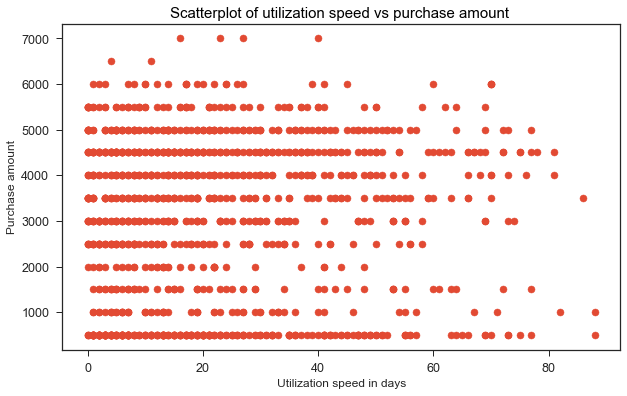

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = list(map(lambda x: x.days ,df['utilization_speed'])), y = df['purchase_amt'])
plt.xlabel("Utilization speed in days")
plt.ylabel("Purchase amount")
plt.title('Scatterplot of utilization speed vs purchase amount ',fontsize = 15,color='black')

plt.show()